#  SIMPLE LINEAR REGRESSION

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [12]:
data = pd.read_csv("ex1data1.txt",header=None)

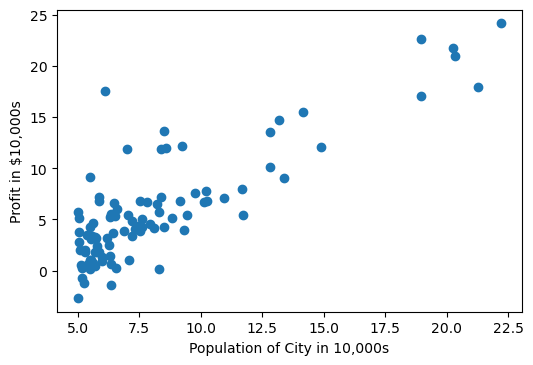

In [71]:
plt.figure(dpi=100)
plt.scatter(data[0],data[1])
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

### Compute cost function value

<img src="simple_linear_regression_cost_function.PNG" width="400" height="200">

In [14]:
def computeCost(X, y, theta):
    m = len(y)
    predictions = X @ theta  # predictions of hypothesis on all examples
    sqrErrors =  (predictions - y) ** 2  # squared errors
    J = 1/(2*m) * sum(sqrErrors)
    return J

In [15]:
m, n = data.shape[0], data.shape[1]
df_ones = np.ones((m,1))
df_ones = pd.DataFrame(df_ones,columns=["coef"])
data = pd.concat([df_ones,data],axis=1)
theta = np.zeros((n))
X =data.iloc[:,0:2].values
y = data.iloc[:,-1].values

In [16]:
computeCost(X,y,theta)

32.072733877455654

In [17]:
iterations = 1500;
alpha = 0.01;

### Calculate Gradient for each theta as a vector and update thetas

<img src="simple_linear_regression_gradient_update.PNG" width="400" height="200">

In [18]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y); # number of training examples
    J_history = np.zeros((num_iters, 1));
    for i in range(num_iters):
        grad_Q =(1/m)* ((X @ theta)-y) @ X
        theta = theta - alpha * grad_Q 
        J_history[i] = computeCost(X, y, theta);
    return theta, J_history  # return theta and J_history

In [19]:
theta, J_history = gradientDescent(X, y, theta, 0.01, 1500)

### Make Predictions on optimized thetas

In [20]:
def predict(x, theta):
    pred = x @ theta.T
    return pred

In [21]:
# predict house prices for 35000 and 70000 population respectively

In [22]:
predict(np.array([1, 3.5]) , theta )* 10000

4519.767867701758

In [23]:
predict(np.array([1, 7]) , theta )* 10000

45342.45012944712

### Best Fit Line Graph

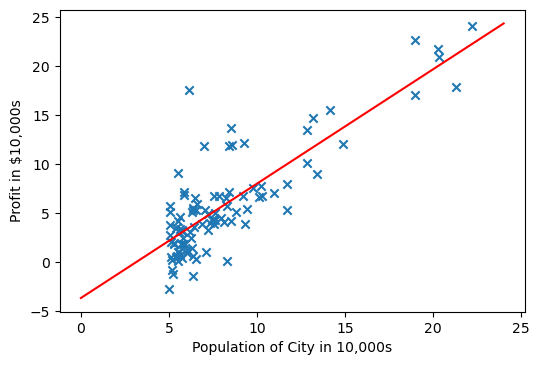

In [74]:
r = np.array(range(0,25))
y_pred = theta[0] + theta[1]* r
plt.figure(dpi=100)
plt.plot(r, y_pred, c="r")
plt.scatter(data[0],data[1],marker="x")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

### Debugging For Cost Function Change Over Time

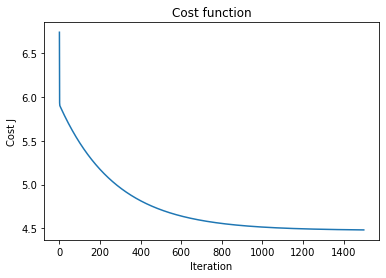

In [75]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Cost function")
plt.show()

### Visualize Cost Function

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [27]:
# initialize J vals to a matrix of 0's
theta0_vals=np.linspace(-10,10,150)
theta1_vals=np.linspace(-2,5,150)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
# Fill out J vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=[theta0_vals[i],theta1_vals[j]]
        J_vals[i,j]=computeCost(X,y,np.array(t))

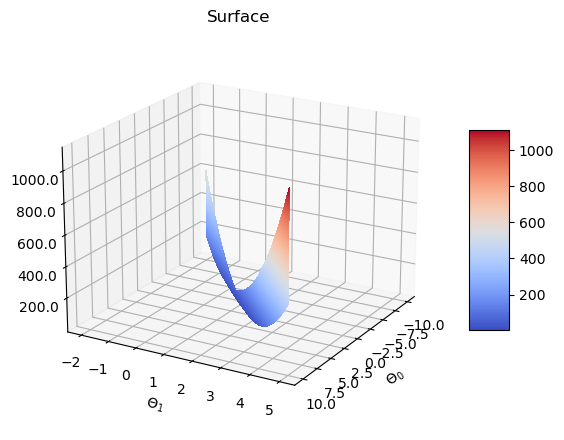

In [28]:
#Generating the surface plot
fig = plt.figure(dpi=100)
ax = Axes3D(fig)
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))
ax.view_init(20,30)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
plt.title("Surface")
plt.show()

###  Contour, showing minimum

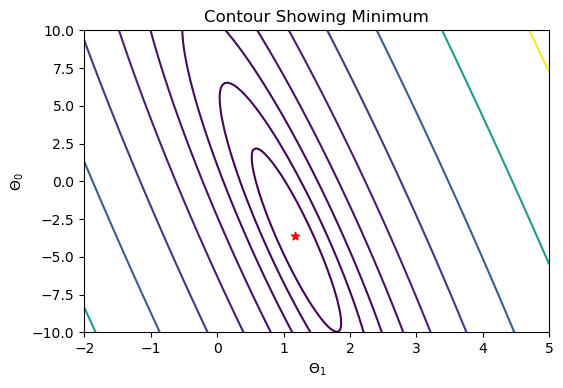

In [29]:
plt.figure(dpi=100)
X, Y = np.meshgrid(theta1_vals, theta0_vals)
plt.contour(X,Y,J_vals, np.logspace(-2, 3, num=20))
plt.xlabel("$\Theta_1$")
plt.ylabel("$\Theta_0$")
plt.title("Contour Showing Minimum")
plt.scatter(theta[1],theta[0],marker="*",c="r")
plt.show()

# MULTIPLE LINEAR REGRESSION

### load data

In [30]:
import seaborn as sns

In [33]:
data2 = pd.read_csv("ex1data2.txt",header=None)

In [34]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
0,47.0,2000.680851,794.702354,852.0,1432.0,1888.0,2269.0,4478.0
1,47.0,3.170213,0.760982,1.0,3.0,3.0,4.0,5.0
2,47.0,340412.659574,125039.899586,169900.0,249900.0,299900.0,384450.0,699900.0


C:\Users\Hp\Anaconda3\envs\itu_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


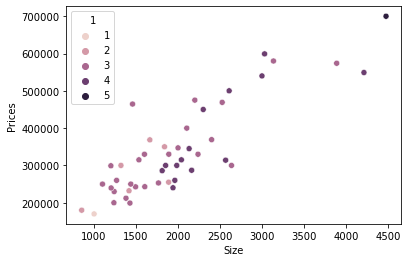

In [45]:
sns.scatterplot(data2[0],data2[2],hue=data2[1])
plt.xlabel("Size")
plt.ylabel("Prices")
plt.show()

In [46]:
# house sizes are about 1000 times the number of bedrooms.

<AxesSubplot:>

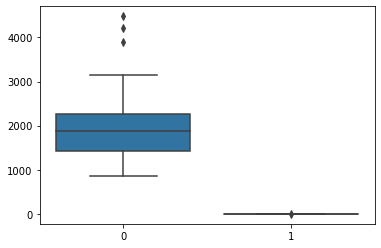

In [47]:
# Boxplot
sns.boxplot(data=data2.iloc[:,0:2])

### normalize features

In [54]:
def featureNormalize(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean) / std
    
    return X_norm, mean, std

In [55]:
# we first normalize features than add 1's column

In [56]:
m, n = data2.shape[0], data2.shape[1]
data2_x = data2.iloc[:,0:2]
data2_y = data2.iloc[:,-1]
X2 = data2_x.values
X2, mean_x ,std_x =featureNormalize(X2)
y2 = data2_y

In [57]:
X2 = np.append(np.ones((m,1)),X2,axis=1)
theta2 = np.zeros((n))

### compute cost for multivariate limnear model

In [58]:
computeCost(X2, y2, theta2 )

65591548106.45744

### compute gradient descent

In [59]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.01,500)

In [60]:
theta2

array([ 3.38175984e+05,  1.03032124e+05, -2.02325233e+02])

### Monitoring cost function change

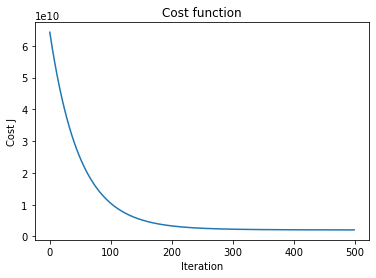

In [76]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Cost function")
plt.show()

### make predictions

In [62]:
sample_x = [1300,4]
sample_x_norm = (sample_x - mean_x)/ std_x
sample_x_norm = np.append(np.ones(1),sample_x_norm)
sample_x_predict = predict(sample_x_norm,theta2)
print("Sample data predict : ",sample_x_predict)

Sample data predict :  246128.5128691179


# NORMAL EQUATION

In [63]:
m, n = data2.shape[0], data2.shape[1]
df_ones = np.ones((m,1))
df_ones = pd.DataFrame(df_ones,columns=["coef"])
data3 = pd.concat([df_ones,data2],axis=1)
X3 =data3.iloc[:,0:3].values
y3 = data3.iloc[:,-1].values

<img src="normal_equation.PNG" width="400" height="200">

In [64]:
def normalEquation(X,y):
    teta = (np.linalg.pinv(X.T @ X)) @ (X.T @ y)
    return teta

In [65]:
theta3 = normalEquation(X3,y3) ; theta3

array([89597.90954361,   139.21067402, -8738.01911255])

###  EXTRA ----  errors of equations

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
# normal equation error :
y_pred_normal = X3 @ theta3

In [68]:
print("normal equation mean squared error : {:.2f}".format(mean_squared_error(y_pred_normal,y3)))

normal equation mean squared error : 4086560101.21


In [69]:
# gradient descent error
y_pred_grad = X2 @ theta2
print("gradient descent mean squared error : {:.2f}".format(mean_squared_error(y_pred_grad,y2)))

gradient descent mean squared error : 4127564807.35
